<a href="https://colab.research.google.com/github/dapsing/python-random-quote/blob/master/BDS_ISglobal_Exposome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISGLOBAL SUMMER WORKSHOP 2021 #
##DATA SCIENCE HANDS-ON SESSION##

Prepared by Dr. Paula Petrone
Biomedical Data Science Team ISGLOBAL

paula.petrone@isglobal.org

### Objectives
1. Understand the structure of a Machine Learning Pipeline
2. Build an end-to-end ML pipeline on a real-world data
3. Train and compare several machine learning for prediction of outcomes 


###Data sets:
- **BMI continuous** (body mass index)
- Raven continuous  (an outcome that measures IQ) 
- Gen_tot (an outcome that measures externalizing behaviour) 

Classification
- BMI categorical (normal vs overweight)


###To be addressed: 
Can we predict high BMI given exposome variables?


# **Machine learning pipeline**

1. Understanding Problem Statement:

    *Can we predict the outcome based on explanatory variables? (regression/classification)*


2. Data Exploration and Preprocessing
 Useful resources: 
   
    [Load data](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2)
    
    [Examine datasset](https://note.nkmk.me/en/python-pandas-len-shape-size/)
  
     [Impute data](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html)

     [Encode categorical variable](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/)
     
    1. Load the data
    2. Impute the missing values
    3. Encode the categorical (string) variables
    4. Normalize/scale the data if required
    5. Descriptive modeling (Correlation analysis)
    6. Exploratory analysis (Unsupervised: PCA, Clustering)

[PCR vs PLS](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html)

[PCA, PCR, PLS](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py)

[PCA vs LDA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

[Scatterplot](https://realpython.com/visualizing-python-plt-scatter/)

[How to cluster & visualize](https://www.askpython.com/python/examples/plot-k-means-clusters-python)


3. Model Building
  1. Define test and train split
  2. Normalization
  3. Train the model & compute train set performance
  4. Test de model on unseen data & compute train set performance

[Linear Regression](https://becominghuman.ai/implementing-and-visualizing-linear-regression-in-python-with-scikit-learn-a073768dc688)


[Logistic regression vs SVR](https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)

[Model evaluation](https://docs.w3cub.com/scikit_learn/auto_examples/classification/plot_classifier_comparison)


4. Reporting and explaining
  1. Model evaluation
  2. Explainability and feature importance

[Feature importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/)



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bmi.xlsx to bmi (1).xlsx
Saving raven.xlsx to raven.xlsx
Saving bmi_cat.xlsx to bmi_cat.xlsx


In [ ]:
import pandas as pd

bmi = pd.read_excel('bmi.xlsx', index_col=None)
#bmi_cat = pd.read_excel('bmi_cat.xlsx', index_col=None)

#raven = pd.read_excel('raven.xlsx', index_col=None)
#gen_tot = pd.read_excel('gen_tot.xlsx', index_col=None)


Verify that data has been acquired correctly

In [ ]:
# Upload datasets

pd.DataFrame (bmi)
#pd.DataFrame (bmi_cat)

#pd.DataFrame (raven)
#pd.DataFrame (gen_tot)

df = bmi
file = 'bmi.xlsx'        
target = 'hs_zbmi_who'  #target variable to predict

##Information on the dataframe
#df.info()

nrow, ncol = df.shape
print('Number of observations, features:',nrow, ncol);
print ()

# Columns
print('List of variables:')
print(list (df.columns.values))


## Load codebook as dictionary
df_code = pd.read_excel(file, index_col='variable_name',sheet_name='codebook')
df_code = df_code[['description','domain','family']]
df_dict = df_code.to_dict('index')


Number of observations, features: 1301 29

List of variables:
['hs_trafnear_h_pow1over3', 'hs_globalexp2_None', 'hs_cotinine_mcat_None', 'hs_participation_3cat_None', 'hs_mecpp_cadj_Log2', 'hs_mep_cadj_Log2', 'hs_pfna_c_Log2', 'hs_pfhxs_c_Log2', 'hs_pbde47_cadj_Log2', 'hs_pbde47_madj_Log2', 'hs_dep_cadj_Log2', 'hs_detp_madj_Log2', 'hs_hcb_cadj_Log2', 'hs_pcb180_cadj_Log2', 'h_lden_cat_preg_None', 'hs_ndvi100_h_None', 'h_ndvi100_preg_None', 'h_temperature_preg_None', 'hs_cd_m_Log2', 'hs_cu_c_Log2', 'h_legume_preg_Ter', 'h_bfdur_Ter', 'h_PM_Log', 'h_NO2_Log', 'h_accesslines300_preg_dic0', 'h_accesspoints300_preg_Log', 'hs_pm25abs_wk_hs_h_Log', 'h_abs_ratio_preg_Log', 'hs_zbmi_who']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hs_trafnear_h_pow1over3     1301 non-null   float64
 1   hs_globalexp2_None          1301 non-null   object 
 2   hs_cotinine_mcat_None       1301 non-null   object 
 3   hs_participation_3cat_None  1301 non-null   object 
 4   hs_mecpp_cadj_Log2          1301 non-null   float64
 5   hs_mep_cadj_Log2            1301 non-null   float64
 6   hs_pfna_c_Log2              1301 non-null   float64
 7   hs_pfhxs_c_Log2             1301 non-null   float64
 8   hs_pbde47_cadj_Log2         1301 non-null   float64
 9   hs_pbde47_madj_Log2         1301 non-null   float64
 10  hs_dep_cadj_Log2            1301 non-null   float64
 11  hs_detp_madj_Log2           1301 non-null   float64
 12  hs_hcb_cadj_Log2            1301 non-null   float64
 13  hs_pcb180_cadj_Log2         1301 

In [ ]:
#Check for null values
#df.info()
df.isna()
df.isna().sum()


# impute missing values by mean -- not needed
#df.h_temperature_preg_None.fillna(bmi.h_temperature_preg_None.mean(), inplace=True)

# impute missing values in training data by mode --not neeeded
#df.h_temperature_preg_None.fillna(bmi.h_temperature_preg_None.mode(), inplace=True)


hs_trafnear_h_pow1over3       0
hs_globalexp2_None            0
hs_cotinine_mcat_None         0
hs_participation_3cat_None    0
hs_mecpp_cadj_Log2            0
hs_mep_cadj_Log2              0
hs_pfna_c_Log2                0
hs_pfhxs_c_Log2               0
hs_pbde47_cadj_Log2           0
hs_pbde47_madj_Log2           0
hs_dep_cadj_Log2              0
hs_detp_madj_Log2             0
hs_hcb_cadj_Log2              0
hs_pcb180_cadj_Log2           0
h_lden_cat_preg_None          0
hs_ndvi100_h_None             0
h_ndvi100_preg_None           0
h_temperature_preg_None       0
hs_cd_m_Log2                  0
hs_cu_c_Log2                  0
h_legume_preg_Ter             0
h_bfdur_Ter                   0
h_PM_Log                      0
h_NO2_Log                     0
h_accesslines300_preg_dic0    0
h_accesspoints300_preg_Log    0
hs_pm25abs_wk_hs_h_Log        0
h_abs_ratio_preg_Log          0
hs_zbmi_who                   0
dtype: int64

In [ ]:
import numpy as np
#Encode categorical variables

#find and exclude categorical variables
df = df.select_dtypes(exclude=[np.object])

#reasign target if excluded as categorical variable -- needed for bmi_cat.xlsx
#df.insert(loc=0, column=target, value=Y)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hs_trafnear_h_pow1over3     1301 non-null   float64
 1   hs_mecpp_cadj_Log2          1301 non-null   float64
 2   hs_mep_cadj_Log2            1301 non-null   float64
 3   hs_pfna_c_Log2              1301 non-null   float64
 4   hs_pfhxs_c_Log2             1301 non-null   float64
 5   hs_pbde47_cadj_Log2         1301 non-null   float64
 6   hs_pbde47_madj_Log2         1301 non-null   float64
 7   hs_dep_cadj_Log2            1301 non-null   float64
 8   hs_detp_madj_Log2           1301 non-null   float64
 9   hs_hcb_cadj_Log2            1301 non-null   float64
 10  hs_pcb180_cadj_Log2         1301 non-null   float64
 11  h_lden_cat_preg_None        1301 non-null   float64
 12  hs_ndvi100_h_None           1301 non-null   float64
 13  h_ndvi100_preg_None         1301 

Normalize continuous variables


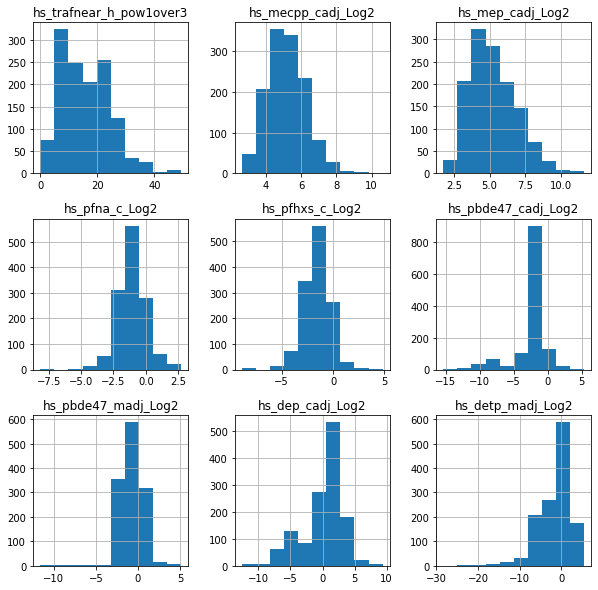

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_reduced = df[list(df.columns)[0:9]] #only plotting a few cols
a = df_reduced.hist(figsize=[10,10])



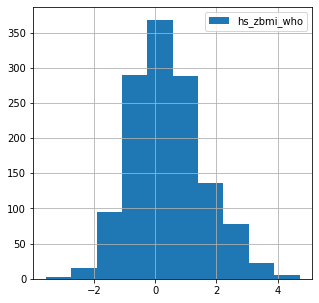

In [ ]:
#Plot histogram of target

df[target].hist(figsize=[5,5], legend=True, xlabelsize=10)
plt.show()



In [ ]:
#Scale the data  (only for descriptive analysis. ML rescale)
from sklearn.preprocessing import StandardScaler
import numpy as np
# create an object of the StandardScaler
scaler = StandardScaler()

# fit with Scaler
df_scaled = df.copy()
df_cols = list(df.columns.values)
features = df[df_cols]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

df_scaled[df_cols] = features  #Puts together the matrix and the names of columns
#df_scaled.info()

Variance
hs_trafnear_h_pow1over3    1.000769
hs_mecpp_cadj_Log2         1.000769
hs_mep_cadj_Log2           1.000769
hs_pfna_c_Log2             1.000769
hs_pfhxs_c_Log2            1.000769
hs_pbde47_cadj_Log2        1.000769
hs_pbde47_madj_Log2        1.000769
hs_dep_cadj_Log2           1.000769
hs_detp_madj_Log2          1.000769
dtype: float64
Mean
hs_trafnear_h_pow1over3    2.732889e-17
hs_mecpp_cadj_Log2         4.361876e-16
hs_mep_cadj_Log2          -4.384570e-16
hs_pfna_c_Log2             5.448712e-17
hs_pfhxs_c_Log2            6.963428e-17
hs_pbde47_cadj_Log2        8.354407e-17
hs_pbde47_madj_Log2        3.584117e-17
hs_dep_cadj_Log2          -1.561651e-17
hs_detp_madj_Log2         -6.430077e-17
dtype: float64


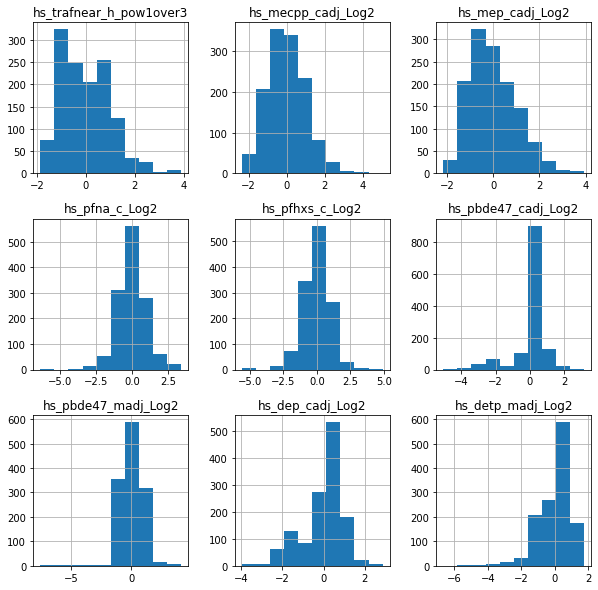

In [ ]:
#Plot distributions

df_scaled_reduced = df_scaled[list(df_scaled.columns)[0:9]]
a = df_scaled_reduced.hist(figsize=[10,10])

print('Variance')
print(df_scaled_reduced.var())

print('Mean')
print(df_scaled_reduced.mean())

# Descriptive modelling

Correlation matrix and hierarchical clustering visualization


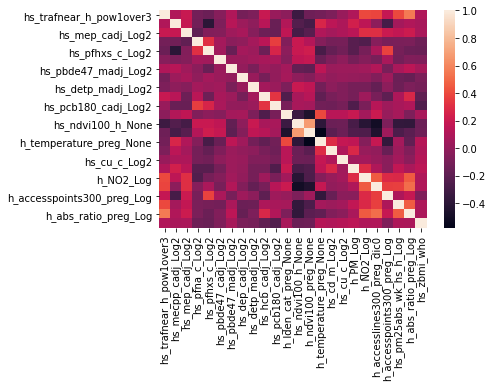

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df_scaled.corr()
sn.heatmap(corrMatrix, annot=False, yticklabels='auto')
plt.show()

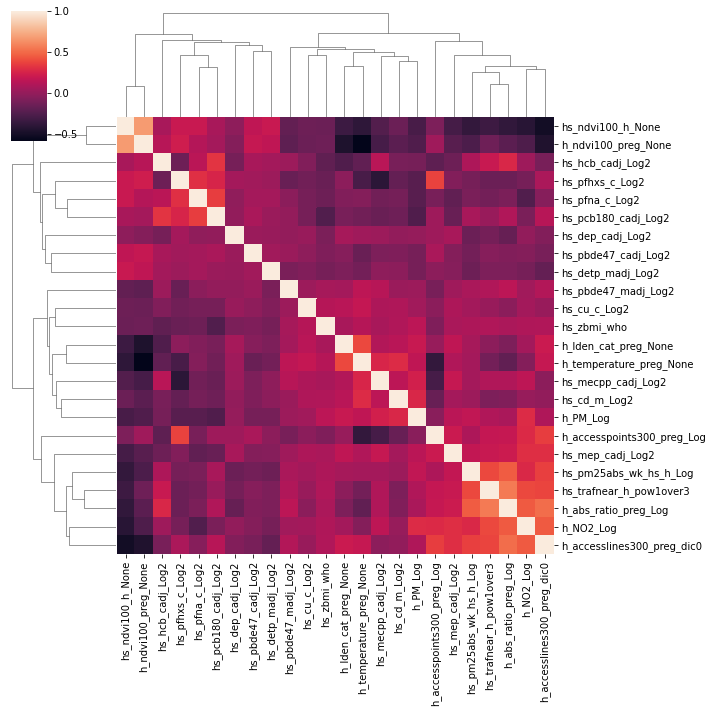

In [ ]:
# Better visualization with hierachical maps
sn.clustermap(corrMatrix)

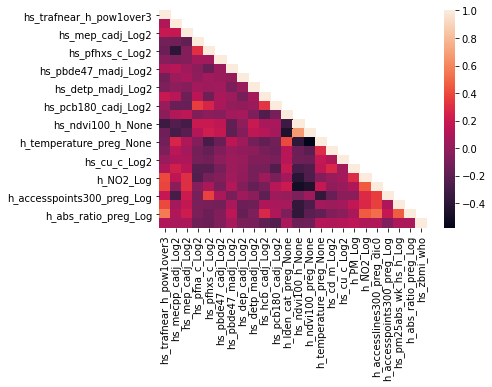

In [ ]:
#Upper diagonal (The full matrix has redundant information)
corr_upper = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
hmap = sn.heatmap(corr_upper)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

In [ ]:
#Find highly correlated pairs

#remove diagonal
np.fill_diagonal(corr_upper.values, 0)

#Find highest correlation pairs sorted
c = corr_upper.abs()
s = c.unstack()
corr_high = s.sort_values(kind="quicksort", ascending=False)[0:5]

print('Pairs of correlated variables ranked:') 
print(corr_high)

Pairs of correlated variables ranked:
hs_ndvi100_h_None           h_ndvi100_preg_None           0.676123
h_ndvi100_preg_None         h_temperature_preg_None       0.580118
hs_trafnear_h_pow1over3     h_abs_ratio_preg_Log          0.561313
h_accesslines300_preg_dic0  h_abs_ratio_preg_Log          0.517363
hs_ndvi100_h_None           h_accesslines300_preg_dic0    0.505670
dtype: float64


In [ ]:
#Find descriptions for variables in dictionary

#Unpack the correlation matrix
corr_high = corr_high.to_frame().reset_index()[['level_0','level_1']]

#Print correlated variables & descriptions
for r in corr_high.index:
  print(corr_high['level_0'][r], '   ', corr_high['level_1'][r])
  print(df_dict[corr_high['level_0'][r]], '   ', df_dict[corr_high['level_1'][r]])
  print()

hs_ndvi100_h_None     h_ndvi100_preg_None
{'description': 'Average of NDVI values within a buffer of 100mat home', 'domain': 'Outdoor exposures', 'family': 'Natural Spaces'}     {'description': 'Average of NDVI values within a buffer of 100mat pregnancy period', 'domain': 'Outdoor exposures', 'family': 'Natural Spaces'}

h_ndvi100_preg_None     h_temperature_preg_None
{'description': 'Average of NDVI values within a buffer of 100mat pregnancy period', 'domain': 'Outdoor exposures', 'family': 'Natural Spaces'}     {'description': 'Temperature average during pregnancy', 'domain': 'Outdoor exposures', 'family': 'Meteorological'}

hs_trafnear_h_pow1over3     h_abs_ratio_preg_Log
{'description': 'Traffic density on nearest road at home', 'domain': 'Outdoor exposures', 'family': 'Traffic'}     {'description': 'abs value (extrapolated back in time using ratio method)duringpregnancy', 'domain': 'Outdoor exposures', 'family': 'Air Pollution'}

h_accesslines300_preg_dic0     h_abs_ratio_preg_Log

In [ ]:
#Correlation between BMI and all variables (sorted)

#Find list of higher correlation
variable_corr = corrMatrix[target].sort_values(kind="quicksort", ascending=False)[0:6]
print('Variables correlated with BMI')
print(variable_corr)
print()

#Unpack correlation matrix
variable_corr = list(variable_corr.to_frame().reset_index()['index'])

#Print correlated variables & descriptions from dictionary
print('Variables correlated with BMI and descriptions')
for var in variable_corr:
   print (var, df_dict[var])
   print()



Variables correlated with BMI
hs_zbmi_who                1.000000
h_PM_Log                   0.150874
h_temperature_preg_None    0.127190
hs_cu_c_Log2               0.125789
hs_cd_m_Log2               0.111152
hs_trafnear_h_pow1over3    0.109318
Name: hs_zbmi_who, dtype: float64

Variables correlated with BMI and descriptions
hs_zbmi_who {'description': 'Body mass index z-score at 6-11 years old - WHO reference - Standardized on sex and age', 'domain': 'Phenotype', 'family': 'Phenotype'}

h_PM_Log {'description': 'Concentration of particulate matter', 'domain': 'Indoor air', 'family': 'Indoor air'}

h_temperature_preg_None {'description': 'Temperature average during pregnancy', 'domain': 'Outdoor exposures', 'family': 'Meteorological'}

hs_cu_c_Log2 {'description': 'Copper (Cu) in child', 'domain': 'Chemicals', 'family': 'Metals'}

hs_cd_m_Log2 {'description': 'Cadmium (Cd) in mother', 'domain': 'Chemicals', 'family': 'Metals'}

hs_trafnear_h_pow1over3 {'description': 'Traffic density 

#PCA analysis#

In [ ]:
#Principal component analysis. Requires standardization (done in previous section)


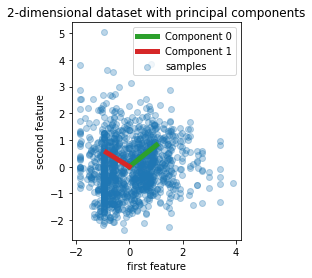

In [ ]:
from sklearn.decomposition import PCA

#DataFrame to use: df_scaled
df_scaled_cols = list(df_scaled.columns.values) #use scaled variables
x = np.array(df_scaled[df_cols])  #Remove column labels

#initialize model
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)   #This is the modeling step

#make a new dataframe with PCAs
principalDf = pd.DataFrame(data=principalComponents
             , columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf], axis=1)


#Visualize PCA projected on to feature 1 and feature 2
plt.scatter(x[:, 0], x[:, 1], alpha=.3, label='samples')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')
plt.legend()
plt.show()


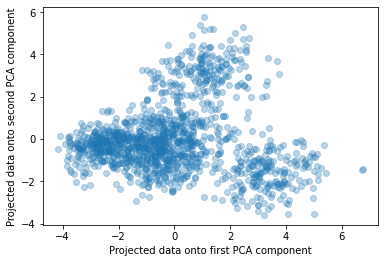

In [ ]:
#Plot data projected onto PCA1 and PCA2

plt.xlabel('Projected data onto first PCA component')
plt.ylabel('Projected data onto second PCA component')

plt.scatter(x.dot(pca.components_[0]), x.dot(pca.components_[1]), alpha=.3)


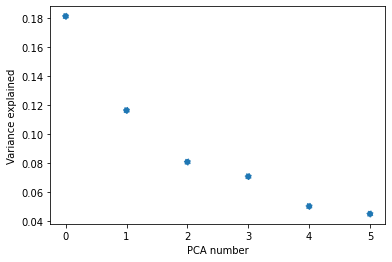

In [ ]:
#PCA loadings

pca6 = PCA(n_components=6)

principalComponents = pca6.fit_transform(df_scaled)

loadings = pd.DataFrame(pca6.components_.T, index=list(df.columns.values))
var_explained = pca6.explained_variance_ratio_

#Plot PCA loadings
plt.scatter([0,1,2,3,4,5], var_explained, linestyle=':')
plt.xlabel('PCA number')
plt.ylabel('Variance explained');
#plt.show()
#loadings

In [ ]:
#Homework: Assess performances of the PCA Bartlett test)#

CLUSTERING OBSERVATIONS projected on PCA1 and PCA2


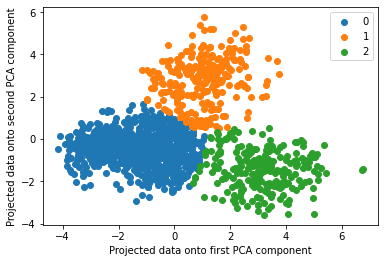

In [ ]:
#Data PCA1 and PCA2

XX = x.dot(pca.components_[0])
YY = x.dot(pca.components_[1])

df_kmeans = pd.DataFrame({'PCA1':XX, 'PCA2':YY})

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_kmeans)

#predict the labels of clusters.
label = kmeans.fit_predict(df_kmeans)
 
#filter rows of original data
filtered_label0 = np.array(df_kmeans[label == 0])

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:

plt.xlabel('Projected data onto first PCA component')
plt.ylabel('Projected data onto second PCA component')

for i in u_labels:
    filtered_label = np.array(df_kmeans[label == i])
    plt.scatter(filtered_label[:,0], filtered_label[:,1], label = i)
plt.legend()
plt.show()
 

I would be interested to find out what each cluster means!

#Model Building
We will predict BMI based on the other attributes
We will try two models here – Linear Regression and Random Forest Regressor to predict the BMI.


In [ ]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Split FIRST in TEST & TRAIN. (AVOID: X_train, X_test, y_train, y_test = train_test_split(X, y, ...))
from sklearn.model_selection import train_test_split
TRAIN,TEST = train_test_split(df, test_size=1/3)

# shape of train and test splits 
TRAIN.shape, TEST.shape


((867, 24), (434, 24))

In [ ]:
#Normalize TRAIN and then apply same transformation to TEST separately

##TRAIN##
# create an object of the StandardScaler
scaler = StandardScaler()

# fit with Scaler
TRAINs = TRAIN.copy()
TRAIN_cols = list(TRAIN.columns.values)
features = TRAIN[TRAIN_cols]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

TRAINs[TRAIN_cols] = features  #Puts together the matrix and the names of columns

TRAINs.shape


(867, 24)

In [ ]:
TRAINs

hs_trafnear_h_pow1over3  ...  hs_zbmi_who
641                 -0.613252  ...    -1.893542
574                 -0.573214  ...     0.593494
1053                -0.830794  ...    -1.387559
420                  0.347641  ...     1.022293
329                 -0.919356  ...    -0.281257
...                       ...  ...          ...
33                  -0.862125  ...     1.228117
643                 -0.919356  ...    -0.384168
88                  -0.609846  ...    -1.601958
82                  -0.964140  ...     0.696406
1156                 0.848299  ...     0.644950

[867 rows x 24 columns]

In [ ]:
#Apply scaler to test

# fit with Scaler
TESTs = TEST.copy()
TEST_cols = list(TEST.columns.values)
features_test = TEST[TEST_cols]

# FIT TO TRAIN. --NO RE-FITTING MODEL !
features_test = scaler.transform(features_test.values)

TESTs[TEST_cols] = features_test  #Puts together the matrix and the names of columns

TESTs.shape
#


(434, 24)

In [ ]:
#Verify scaling

print('Variance TRAIN')
print(TRAINs.var())

print('Mean TRAIN')
print(TRAINs.mean())

print('Variance TEST')
print(TESTs.var())

print('Mean TEST')
print(TESTs.mean())

Variance TRAIN
hs_trafnear_h_pow1over3       1.001155
hs_mecpp_cadj_Log2            1.001155
hs_mep_cadj_Log2              1.001155
hs_pfna_c_Log2                1.001155
hs_pfhxs_c_Log2               1.001155
hs_pbde47_cadj_Log2           1.001155
hs_pbde47_madj_Log2           1.001155
hs_dep_cadj_Log2              1.001155
hs_detp_madj_Log2             1.001155
hs_hcb_cadj_Log2              1.001155
hs_pcb180_cadj_Log2           1.001155
h_lden_cat_preg_None          1.001155
hs_ndvi100_h_None             1.001155
h_ndvi100_preg_None           1.001155
h_temperature_preg_None       1.001155
hs_cd_m_Log2                  1.001155
hs_cu_c_Log2                  1.001155
h_PM_Log                      1.001155
h_NO2_Log                     1.001155
h_accesslines300_preg_dic0    1.001155
h_accesspoints300_preg_Log    1.001155
hs_pm25abs_wk_hs_h_Log        1.001155
h_abs_ratio_preg_Log          1.001155
hs_zbmi_who                   1.001155
dtype: float64
Mean TRAIN
hs_trafnear_h_pow1over3

##Linear Regression##

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Separate de independent variable in TRAIN AND TEST

x_train = TRAINs.drop(columns=[target])
y_train = TRAINs[target]

x_test = TESTs.drop(columns=[target])
y_test = TESTs[target]

# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(x_train, y_train)

# predict the target on train and test data 
predict_train = model_LR.predict(x_train)
predict_test  = model_LR.predict(x_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, predict_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2: %.2f'
      % r2_score(y_test, predict_test))

RMSE on train data:  0.9203148085399748
RMSE on test data:  0.9049772380332127
Mean squared error: 0.85
Coefficient of determination r2: 0.08


Assume R2 = 0.10
It can be referred that 10% of the changeability of the dependent output attribute can be explained by the model while the remaining 91 % of the variability is still unaccounted for.
R2 indicates the proportion of the outcome explained by the model. A higher value of R2 is desirable as it indicates better results

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.

The coefficient of determination can be negative (CoD). ... This negative value indicates that the data are not explained by the model. In other words, the mean of the data is a better model than the regression. If CoD is used as an accuracy measure, then the data should not be the regression data

In [ ]:
#Repeat the analysis with the highly correlated variables
TRAIN_reduced = TRAINs[variable_corr]
TRAIN_reduced.shape

TEST_reduced = TESTs[variable_corr]
TEST_reduced.shape

#Separate de independent variable in TRAIN AND TEST

x_train = TRAIN_reduced.drop(columns=[target])
y_train = TRAIN_reduced[target]

x_test = TEST_reduced.drop(columns=[target])
y_test = TEST_reduced[target]

# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(x_train, y_train)

# predict the target on train and test data 
predict_train = model_LR.predict(x_train)
predict_test  = model_LR.predict(x_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, predict_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination r2: %.2f'
      % r2_score(y_test, predict_test))


RMSE on train data:  0.970005570065978
RMSE on test data:  0.9240312678096095
Mean squared error: 0.94
Coefficient of determination r2: 0.04


Simpler model not always makes it better!

#Support Vector Regression#
Three types of kernels

In [ ]:
from sklearn.svm import SVR

#Separate de independent variable in TRAIN AND TEST

x_train = TRAINs.drop(columns=[target])
y_train = TRAINs[target]

x_test = TESTs.drop(columns=[target])
y_test = TESTs[target]

#Define models

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

#Train models
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

#Predict
print('Coefficients of determination r2: ')
print(' RBF kernel r2: %s' %(r2_score(y_test, y_rbf)))
print(' Lineal kernel r2: %s' %(r2_score(y_test, y_lin)))
print(' Polynomial kernel r2: %s' %(r2_score(y_test, y_poly)))



Coefficients of determination r2: 
 RBF kernel r2: -0.06547594707035143
 Lineal kernel r2: 0.11355132987449801
 Polynomial kernel r2: -1.0074179752625132


#Classification#

Resources [Histogram](https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3)

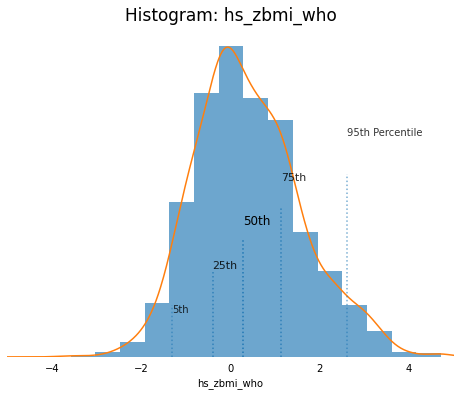

In [ ]:
#Plot histogram of target to select 95% threshold 

df_ = df[target]  #select only the target variable to plot
fig, ax = plt.subplots(figsize = (8,6))

# Plot
    # Plot histogram
df_.plot(kind = "hist", density = True, alpha = 0.65, bins = 15) # change density to true, because KDE uses density
    # Plot KDE
df_.plot(kind = "kde")

    # Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = df_.quantile(0.05), df_.quantile(0.25), df_.quantile(0.5), df_.quantile(0.75), df_.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


# X
ax.set_xlabel(target)
ax.set_xlim(-5, 5)
# Y

ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5, 0.05, "5th", size = 10, alpha = 0.8);
ax.text(quant_25, 0.10, "25th", size = 11, alpha = 0.85);
ax.text(quant_50, 0.15, "50th", size = 12, alpha = 1);
ax.text(quant_75, 0.20, "75th", size = 11, alpha = 0.85);
ax.text(quant_95, 0.25, "95th Percentile", size = 10, alpha =.8);

# Overall
ax.grid(False)
ax.set_title("Histogram: %s" %(target), size = 17, pad = 10)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()


Kernel-Density-Estimation (KDE). KDE tries to compute the underlying distribution of a variable, which will draw a very smooth line around the histogram. 

##Comparison between several ML classifiers##

In [ ]:
# Classification

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Classifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

#Classifier definition
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#target
target_bin = 'hs_zbmi_who_cat'

# TEST and TEST scaled
x_train = TRAINs.drop(columns=[target])
y_train = TRAINs[target]

x_test = TESTs.drop(columns=[target])
y_test = TESTs[target]

# Binarize target variable in TESTs and TRAINs
threshold = quant_50

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_train = sklearn.preprocessing.binarize(y_train, threshold=threshold, copy=True)

y_test = sklearn.preprocessing.binarize(y_test, threshold=threshold, copy=True)



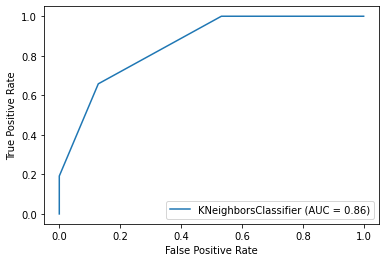

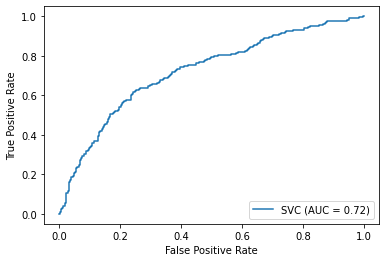

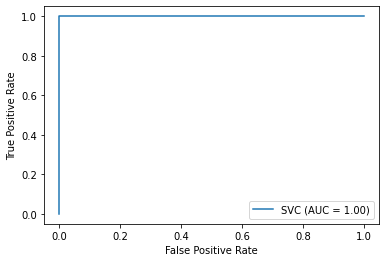

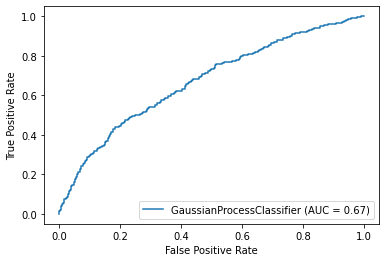

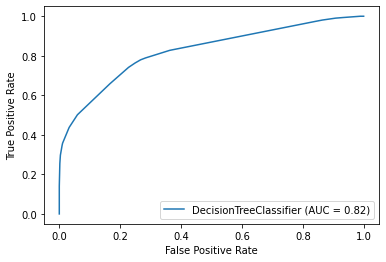

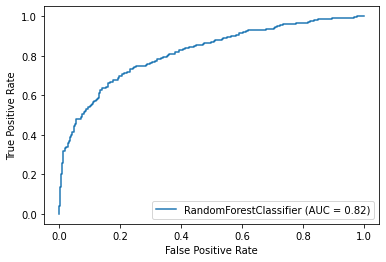

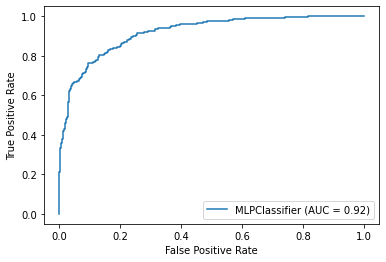

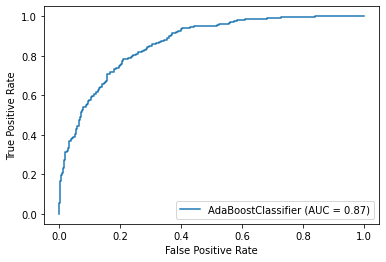

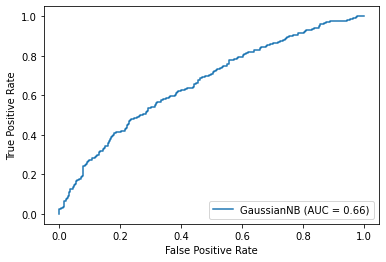

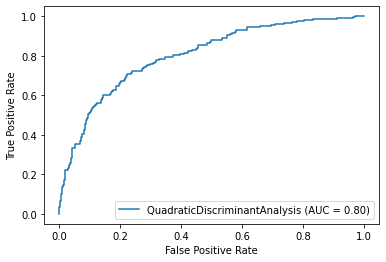

In [ ]:
#Libraries#

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


#Many models produce a warning given low signal and unbalance dataset
import warnings   
warnings.filterwarnings("ignore")

#Test all the classifiers and produce Area under the Receiver Operating Curve
for name, clf in zip(names, classifiers):
        y_pred = clf.fit(x_train, y_train).predict(x_test).reshape(-1, 1)
        plot_roc_curve(clf, x_train, y_train)
        #plot_roc_curve(clf, x_test, y_test)


##Feature importance##
Sourced from [Link](https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d)

Best resource: [Link](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

23
['h_abs_ratio_preg_log', 'h_accesslines300_preg_dic0', 'h_accesspoints300_preg_log', 'h_lden_cat_preg_none', 'h_ndvi100_preg_none', 'h_no2_log', 'h_pm_log', 'h_temperature_preg_none', 'hs_cd_m_log2', 'hs_cu_c_log2', 'hs_dep_cadj_log2', 'hs_detp_madj_log2', 'hs_hcb_cadj_log2', 'hs_mecpp_cadj_log2', 'hs_mep_cadj_log2', 'hs_ndvi100_h_none', 'hs_pbde47_cadj_log2', 'hs_pbde47_madj_log2', 'hs_pcb180_cadj_log2', 'hs_pfhxs_c_log2', 'hs_pfna_c_log2', 'hs_pm25abs_wk_hs_h_log', 'hs_trafnear_h_pow1over3']


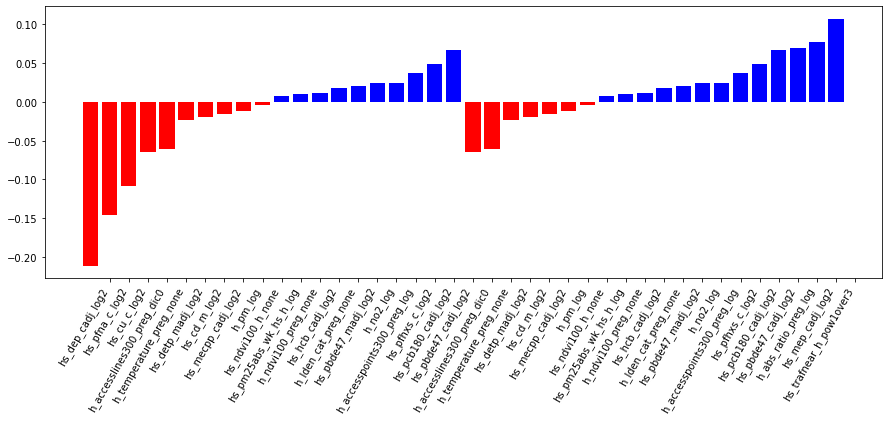

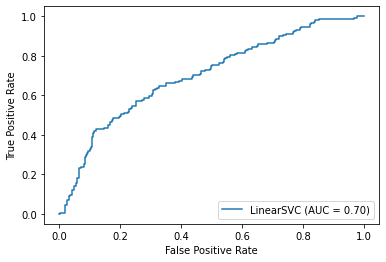

In [ ]:
#Feature importance for SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

data = x_test

# Plot function
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

top_features = 10
# Get thes names
cv = CountVectorizer()
cv.fit(data)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(data)

svm = LinearSVC()
svm.fit(x_train, y_train)
plot_coefficients(svm, cv.get_feature_names())
plot_roc_curve(svm, x_test, y_test)


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


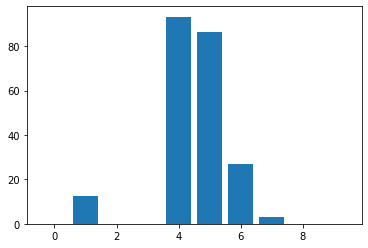

In [ ]:
#Feature importance for linear regression

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
x_train, y_train = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance


for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# THANK YOU FOR YOUR PARTICIPATION !!

# SEE YOU IN 2022 

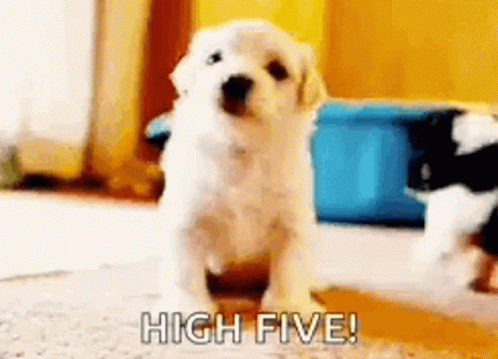

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

# Display GIF in Jupyter, CoLab, IPython
with open('puppy-dog.gif','rb') as f:
    display.Image(data=f.read(), format='png')